# Replikacija rezultata

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("shot_logs_processed.csv") #ucitavanje obrađenih podataka
data.head(10)

,GAME_ID,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id,GAME_CLOCK_SEC
0,21400899,0,1,24,1,1,1:09,10.800000,2,1.9,7.7,2,0,101187,1.3,203148,69
1,21400899,0,1,24,2,1,0:14,3.400000,0,0.8,28.2,3,1,202711,6.1,203148,14
2,21400899,0,1,24,3,1,0:00,12.453344,3,2.7,10.1,2,1,202711,0.9,203148,0
3,21400899,0,1,24,4,2,11:47,10.300000,2,1.9,17.2,2,1,203900,3.4,203148,707
4,21400899,0,1,24,5,2,10:34,10.900000,2,2.7,3.7,2,1,201152,1.1,203148,634
5,21400899,0,1,24,6,2,8:15,9.100000,2,4.4,18.4,2,1,101114,2.6,203148,495
6,21400899,0,1,24,7,4,10:15,14.500000,11,9.0,20.7,2,1,101127,6.1,203148,615
7,21400899,0,1,24,8,4,8:00,3.400000,3,2.5,3.5,2,0,203486,2.1,203148,480
8,21400899,0,1,24,9,4,5:14,12.400000,0,0.8,24.6,3,1,202721,7.3,203148,314
9,21400890,1,1,1,1,2,11:32,17.400000,0,1.1,22.4,3,1,201961,19.8,203148,692


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122728 entries, 0 to 122727
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     122728 non-null  int64  
 1   LOCATION                    122728 non-null  int64  
 2   W                           122728 non-null  int64  
 3   FINAL_MARGIN                122728 non-null  int64  
 4   SHOT_NUMBER                 122728 non-null  int64  
 5   PERIOD                      122728 non-null  int64  
 6   GAME_CLOCK                  122728 non-null  object 
 7   SHOT_CLOCK                  122728 non-null  float64
 8   DRIBBLES                    122728 non-null  int64  
 9   TOUCH_TIME                  122728 non-null  float64
 10  SHOT_DIST                   122728 non-null  float64
 11  PTS_TYPE                    122728 non-null  int64  
 12  SHOT_RESULT                 122728 non-null  int64  
 13  CLOSEST_DEFEND

Normalizirati ćemo podatke jer određena treniranja zahtjevaju normalizirane podatke.

In [4]:
scaler = StandardScaler()
numeric_features = ['FINAL_MARGIN','SHOT_CLOCK','DRIBBLES','TOUCH_TIME','SHOT_NUMBER','SHOT_DIST', 'CLOSE_DEF_DIST', 'GAME_CLOCK_SEC']
data[numeric_features] = scaler.fit_transform(data[numeric_features])
data.head()

,GAME_ID,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_id,GAME_CLOCK_SEC
0,21400899,0,1,1.923006,-1.167550,1,1:09,-0.274974,-0.023268,-0.317349,-0.683445,2,0,101187,-1.037701,203148,-1.362397
1,21400899,0,1,1.923006,-0.956051,1,0:14,-1.610152,-0.592869,-0.685012,1.633546,3,1,202711,0.713849,203148,-1.627362
2,21400899,0,1,1.923006,-0.744552,1,0:00,0.023338,0.261532,-0.049957,-0.412188,2,1,202711,-1.183664,203148,-1.694808
3,21400899,0,1,1.923006,-0.533054,2,11:47,-0.365189,-0.023268,-0.317349,0.390283,2,1,203900,-0.271398,203148,1.711200
4,21400899,0,1,1.923006,-0.321555,2,10:34,-0.256931,-0.023268,-0.049957,-1.135541,2,1,201152,-1.110683,203148,1.359519


Možemo izbaciti GAME_CLOCK budući da je napravljen GAME_CLOCK_SEC kao numerička vrijednost te nam je ova vrijednost nebitna.

In [5]:
data = data.drop(columns=['GAME_CLOCK'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122728 entries, 0 to 122727
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     122728 non-null  int64  
 1   LOCATION                    122728 non-null  int64  
 2   W                           122728 non-null  int64  
 3   FINAL_MARGIN                122728 non-null  float64
 4   SHOT_NUMBER                 122728 non-null  float64
 5   PERIOD                      122728 non-null  int64  
 6   SHOT_CLOCK                  122728 non-null  float64
 7   DRIBBLES                    122728 non-null  float64
 8   TOUCH_TIME                  122728 non-null  float64
 9   SHOT_DIST                   122728 non-null  float64
 10  PTS_TYPE                    122728 non-null  int64  
 11  SHOT_RESULT                 122728 non-null  int64  
 12  CLOSEST_DEFENDER_PLAYER_ID  122728 non-null  int64  
 13  CLOSE_DEF_DIST

In [7]:
# Razdvajanje na značajke (X) i ciljne varijable (y)
X = data.drop(columns=['SHOT_RESULT'])  #SHOT_RESULT cilj
y = data['SHOT_RESULT']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistička regresija

Uzimamo različite hiperparametre kako bismo vidjeli koji daju nabolje rezultate

In [9]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

In [10]:
grid_search_logistic = GridSearchCV(logistic_model, logistic_param_grid, scoring='accuracy', cv=3)
grid_search_logistic.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2']},
             scoring='accuracy')

In [11]:
best_logistic_model = grid_search_logistic.best_estimator_
print(f"Najbolji parametri za Logistic Regression: {grid_search_logistic.best_params_}")

Najbolji parametri za Logistic Regression: {'C': 0.01, 'penalty': 'l2'}


**Točnost za logističku regresiju**

In [12]:
y_pred_logistic = best_logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Točnost za Logistic Regression: {logistic_accuracy:.2f}")

Točnost za Logistic Regression: 0.55


**Matrica zabune**

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Matrica zabune:")
print(conf_matrix)


Matrica zabune:
[[    0 11096]
 [    0 13450]]


**Izvještaj klasifikacije**

In [14]:
print("Izvještaj klasifikacije:")
print(classification_report(y_test, y_pred_logistic))

Izvještaj klasifikacije:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11096
           1       0.55      1.00      0.71     13450

    accuracy                           0.55     24546
   macro avg       0.27      0.50      0.35     24546
weighted avg       0.30      0.55      0.39     24546



C:\Users\karme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

# XGBoost

In [15]:
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

In [16]:
grid_search_xgboost = GridSearchCV(xgboost_model, xgboost_param_grid, scoring='accuracy', cv=3)
grid_search_xgboost.fit(X_train, y_train)

C:\Users\karme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:16:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\karme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:16:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\karme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarnin

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [17]:
best_xgboost_model = grid_search_xgboost.best_estimator_
print(f"Najbolji parametri za XGBoost: {grid_search_xgboost.best_params_}")

Najbolji parametri za XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}


**Točnost za XGBoost**

In [18]:
y_pred_xgboost = best_xgboost_model.predict(X_test)
xgboost_accuracy = accuracy_score(y_test, y_pred_xgboost)
print(f"Točnost za XGBoost: {xgboost_accuracy:.2f}")

Točnost za XGBoost: 0.62


**Matrica zabune**

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred_xgboost)
print("Matrica zabune:")
print(conf_matrix)

Matrica zabune:
[[ 3767  7329]
 [ 2011 11439]]


In [20]:
print("Izvještaj klasifikacije:")
print(classification_report(y_test, y_pred_xgboost))

Izvještaj klasifikacije:
              precision    recall  f1-score   support

           0       0.65      0.34      0.45     11096
           1       0.61      0.85      0.71     13450

    accuracy                           0.62     24546
   macro avg       0.63      0.59      0.58     24546
weighted avg       0.63      0.62      0.59     24546



# SVM

In [23]:
from sklearn.svm import LinearSVC

linear_svc_model = LinearSVC(max_iter=10000) 
linear_svc_param_grid = {
    'C': [1, 10] 
}

In [24]:
grid_search_linear_svc = GridSearchCV(linear_svc_model, linear_svc_param_grid, scoring='accuracy', cv=3)
grid_search_linear_svc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(max_iter=10000),
             param_grid={'C': [1, 10]}, scoring='accuracy')

In [25]:
best_linear_svc = grid_search_linear_svc.best_estimator_
print(f"Najbolji parametri za LinearSVC: {grid_search_linear_svc.best_params_}")

Najbolji parametri za LinearSVC: {'C': 1}


In [27]:
y_pred_svc = best_linear_svc.predict(X_test)

**Točnost za SVM**

In [28]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Točnost za SVC: {accuracy_svc:.2f}")

Točnost za SVC: 0.55


**Matrica zabune**

In [29]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("Matrica zabune:")
print(conf_matrix_svc)

Matrica zabune:
[[    0 11096]
 [    0 13450]]


In [30]:
print("Izvještaj klasifikacije:")
print(classification_report(y_test, y_pred_svc))

Izvještaj klasifikacije:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11096
           1       0.55      1.00      0.71     13450

    accuracy                           0.55     24546
   macro avg       0.27      0.50      0.35     24546
weighted avg       0.30      0.55      0.39     24546



C:\Users\karme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

# Random forest

In [31]:
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

In [32]:
grid_search_rf = GridSearchCV(rf_model, rf_param_grid, scoring='accuracy', cv=3)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [33]:
best_rf_model = grid_search_rf.best_estimator_
print(f"Najbolji parametri za Random Forest: {grid_search_rf.best_params_}")

Najbolji parametri za Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


**Točnost za Random forest**

In [34]:
y_pred_rf = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Točnost za Random Forest: {rf_accuracy:.2f}")

Točnost za Random Forest: 0.62


**Matrica zabune**

In [35]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrica konfuzije:")
print(conf_matrix_rf)

Matrica konfuzije:
[[ 3671  7425]
 [ 1919 11531]]


In [36]:
print("Izvještaj klasifikacije:")
print(classification_report(y_test, y_pred_rf))

Izvještaj klasifikacije:
              precision    recall  f1-score   support

           0       0.66      0.33      0.44     11096
           1       0.61      0.86      0.71     13450

    accuracy                           0.62     24546
   macro avg       0.63      0.59      0.58     24546
weighted avg       0.63      0.62      0.59     24546



# ROC (Receiver Operating Characteristic) i AUC (Area Under the Curve) krivulje

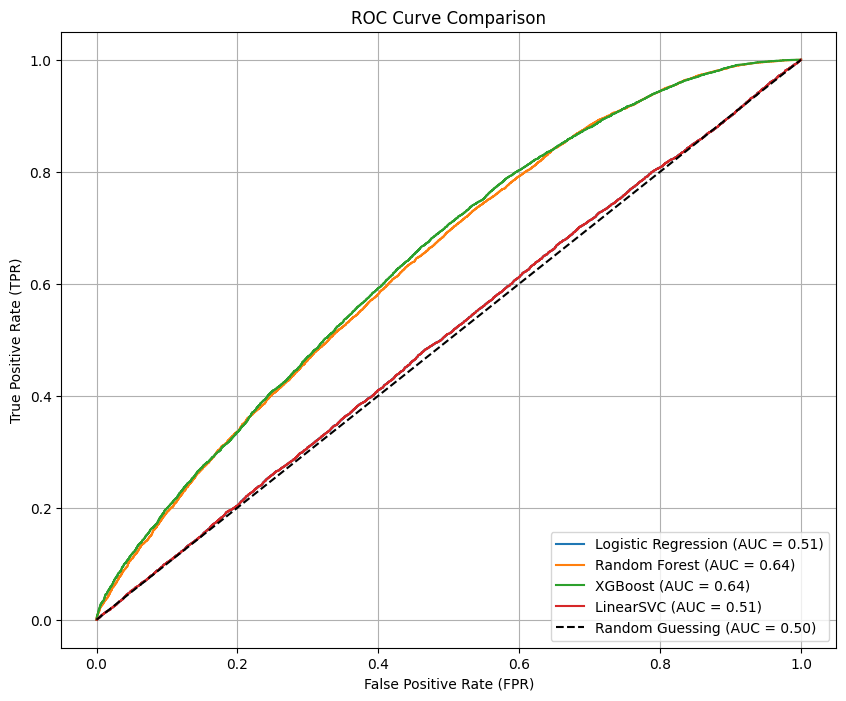

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Logistic Regression
y_pred_prob_log = best_logistic_model.predict_proba(X_test)[:, 1]  # Uzmi vjerojatnost za klasu "1"
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# 2. Random Forest
y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# 3. XGBoost
y_pred_prob_xgb = best_xgboost_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# 4. LinearSVC (pretvaramo odluke u pseudo-vjerojatnosti)
from sklearn.calibration import CalibratedClassifierCV
calibrated_svc = CalibratedClassifierCV(best_linear_svc, cv='prefit') 
calibrated_svc.fit(X_train, y_train)
y_pred_prob_svc = calibrated_svc.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_prob_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# crtanje ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'LinearSVC (AUC = {roc_auc_svc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.50)')

# Graf stil
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Usporedba

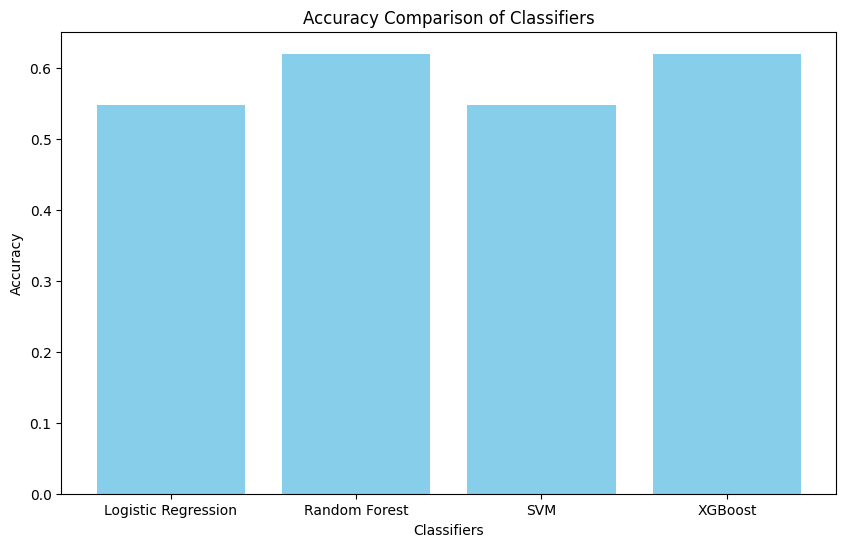

In [39]:
classifiers = ["Logistic Regression", "Random Forest", "SVM", "XGBoost"]
accuracies = [logistic_accuracy, rf_accuracy, accuracy_svc, xgboost_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color='skyblue')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.show()


In [40]:
from sklearn.metrics import precision_score

precision_log = precision_score(y_test, y_pred_logistic)  # Logistic Regression
precision_rf = precision_score(y_test, y_pred_rf)    # Random Forest
precision_svc = precision_score(y_test, y_pred_svc)  # SVM
precision_xgb = precision_score(y_test, y_pred_xgboost)  # XGBoost

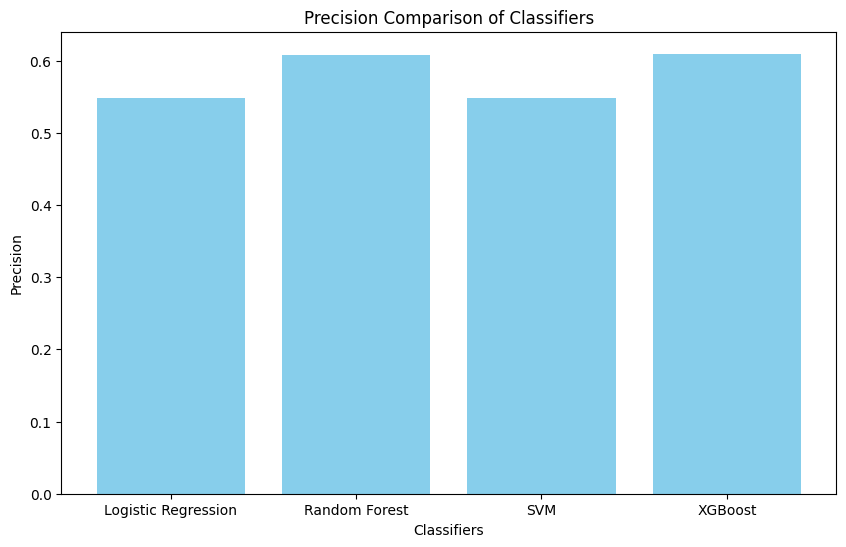

In [41]:
classifiers = ["Logistic Regression", "Random Forest", "SVM", "XGBoost"]

precision_all = [precision_log, precision_rf, precision_svc, precision_xgb]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, precision_all, color='skyblue')

plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.title('Precision Comparison of Classifiers')

plt.show()


In [42]:
from sklearn.metrics import f1_score

f1_log = f1_score(y_test, y_pred_logistic)  # Logistic Regression
f1_rf = f1_score(y_test, y_pred_rf)    # Random Forest
f1_svc = f1_score(y_test, y_pred_svc)  # SVM
f1_xgb = f1_score(y_test, y_pred_xgboost)  # XGBoost


[np.float64(0.707969259922097), np.float64(0.7116583348762575), np.float64(0.707969259922097), np.float64(0.7100999441306102)]


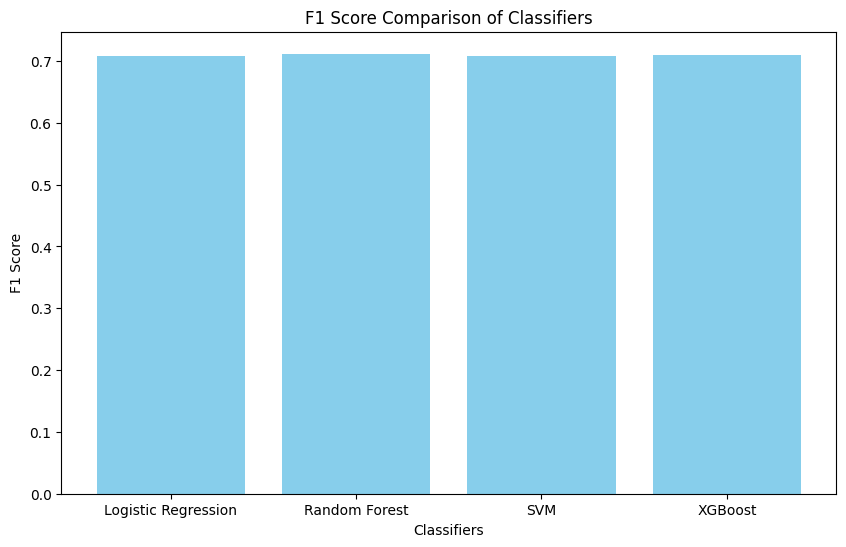

In [43]:
classifiers = ["Logistic Regression", "Random Forest", "SVM", "XGBoost"]

f1_all = [f1_log, f1_rf, f1_svc, f1_xgb]
print(f1_all)

plt.figure(figsize=(10, 6))
plt.bar(classifiers, f1_all, color='skyblue')

plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Classifiers')

plt.show()
